In [1]:
import sys
import os
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../')))
import gillespy2
from gillespy2 import SSACSolver

In [2]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()

In [4]:
results = model.run(solver=SSACSolver, number_of_trajectories=20)

In [5]:
import matplotlib.pyplot as plt

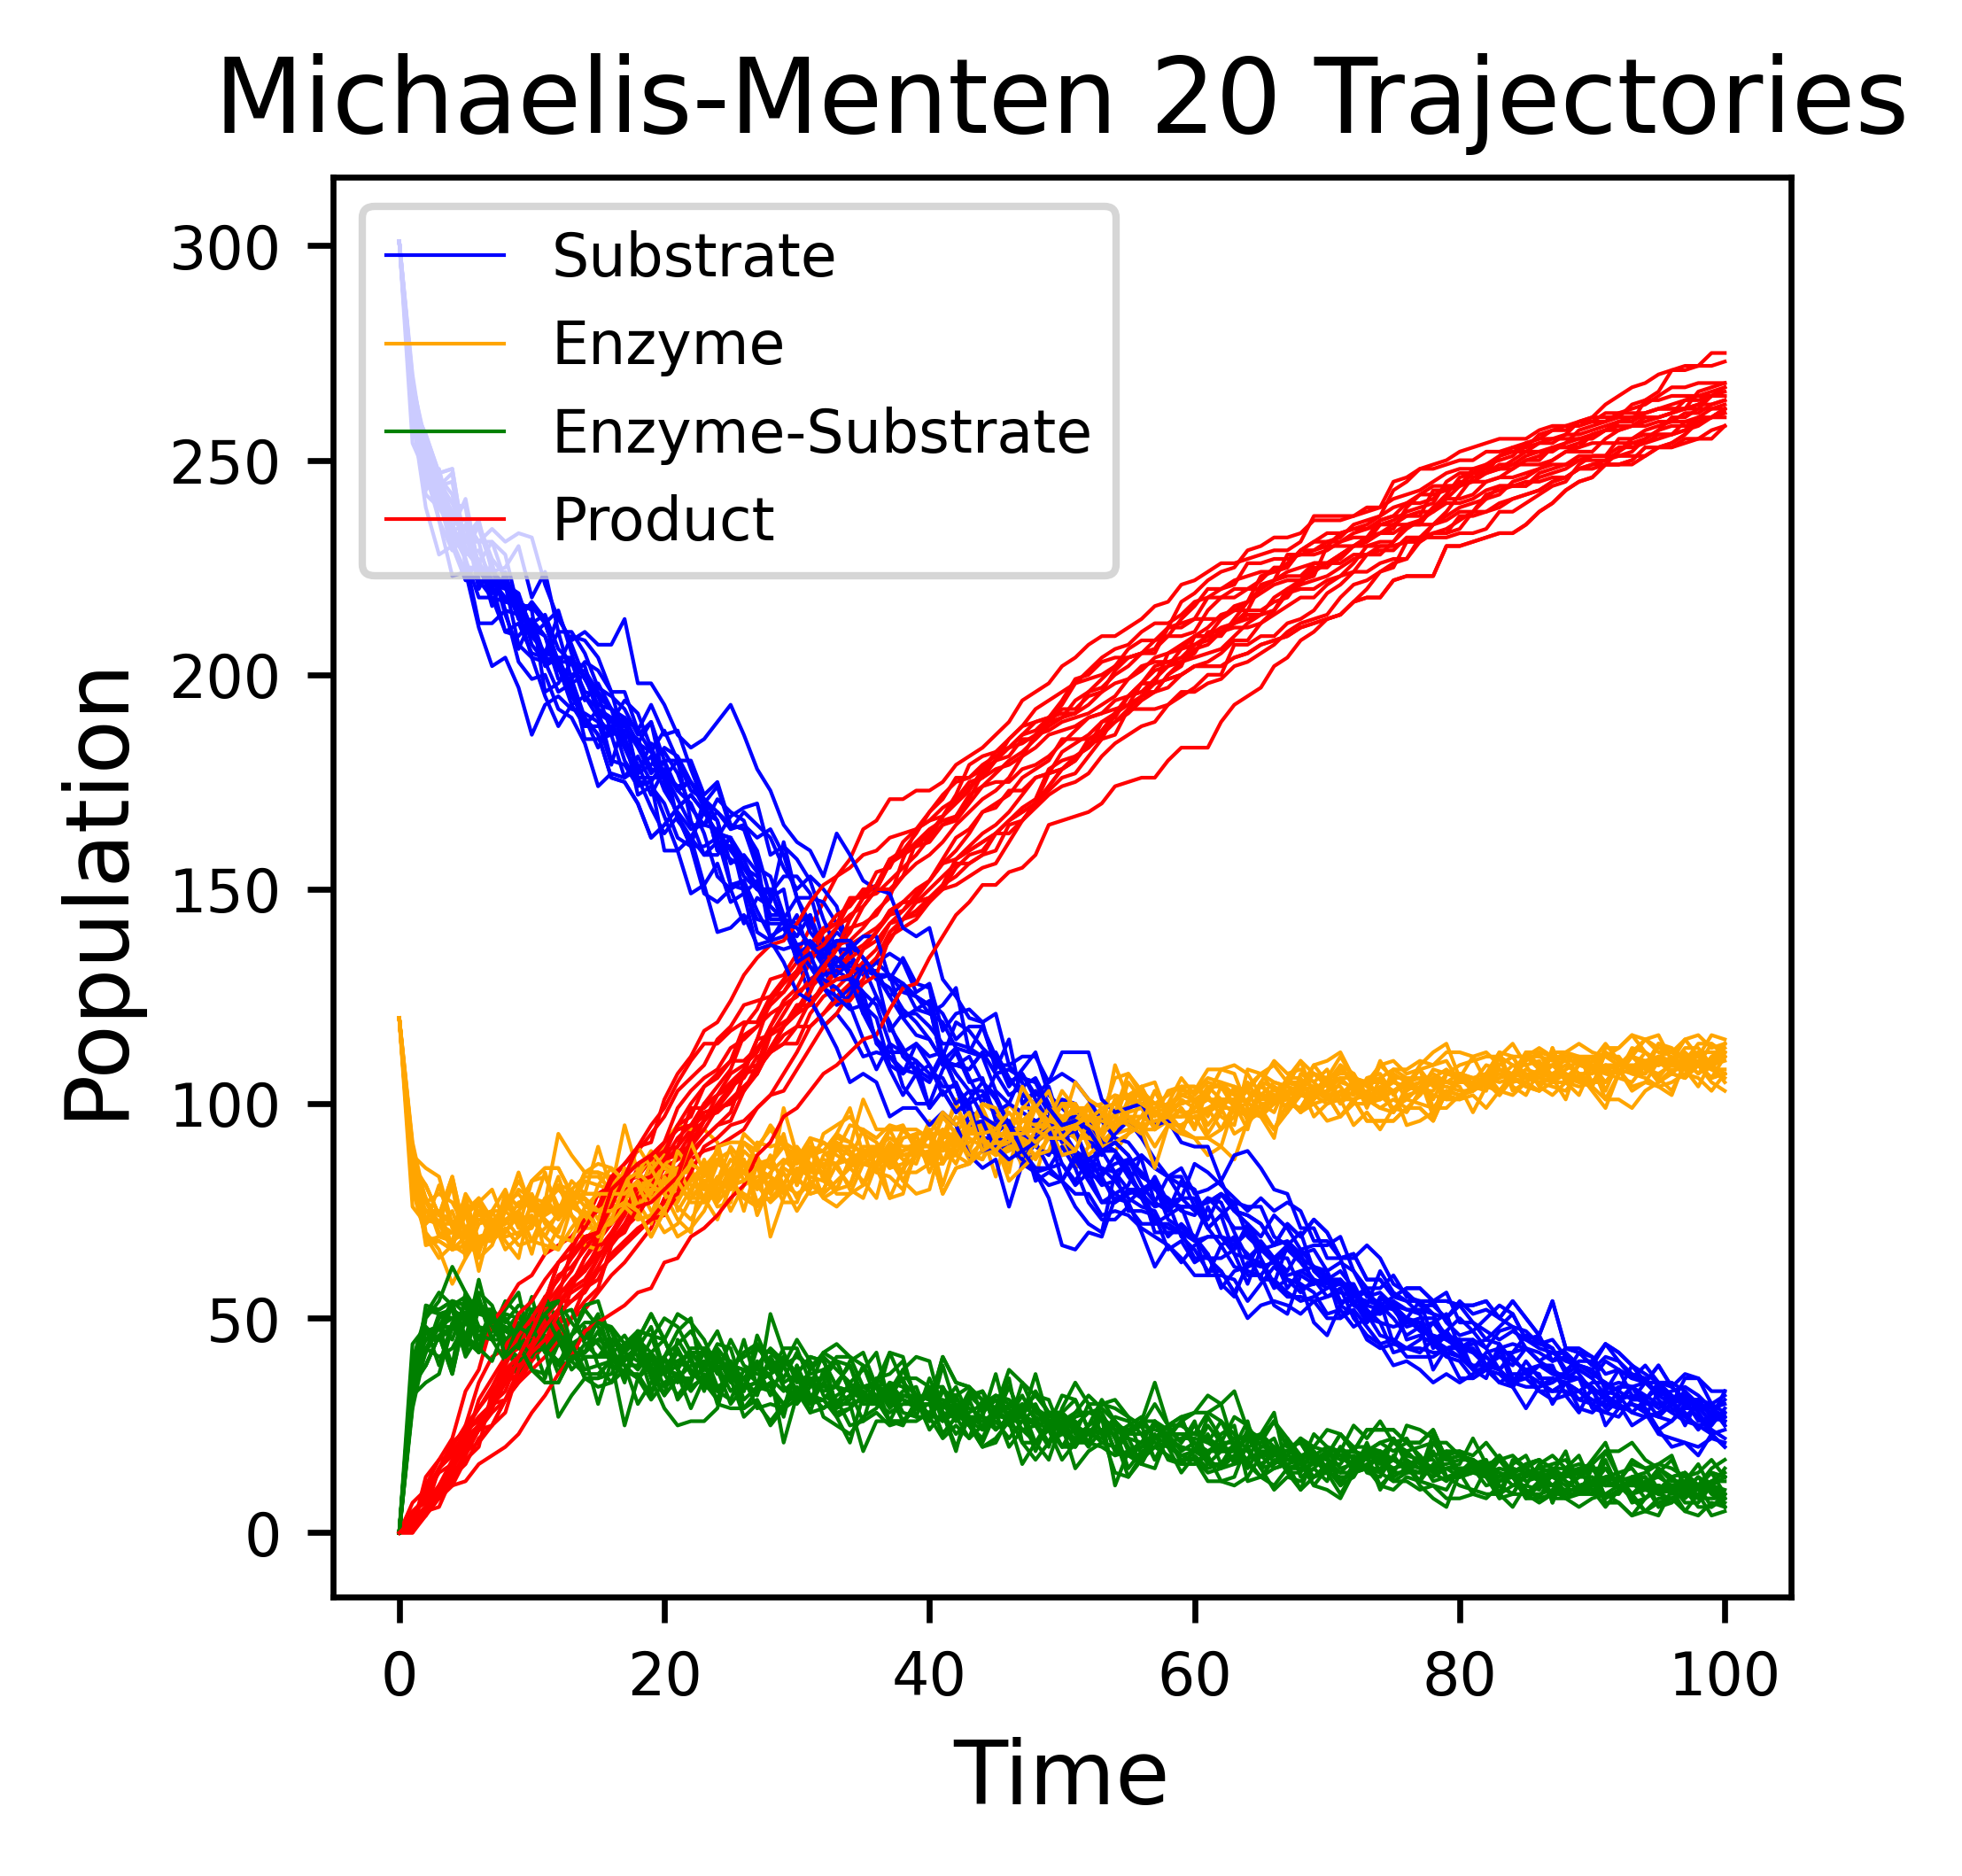

In [6]:
fig = plt.figure(figsize=(3.54,3.54), dpi=600)
for i in range(20):
    plt.plot(results[0]['time'], results[i]['A'], c='blue', linewidth=.5)
    plt.plot(results[0]['time'], results[i]['B'], c='orange', linewidth=.5)
    plt.plot(results[0]['time'], results[i]['C'], c='green', linewidth=.5)
    plt.plot(results[0]['time'], results[i]['D'], c='red', linewidth=.5)
plt.plot(results[0]['time'], results[-1]['A'], c='blue', linewidth=.5, label='Substrate')
plt.plot(results[0]['time'], results[-1]['B'], c='orange', linewidth=.5, label='Enzyme')
plt.plot(results[0]['time'], results[-1]['C'], c='green', linewidth=.5, label='Enzyme-Substrate')
plt.plot(results[0]['time'], results[-1]['D'], c='red', linewidth=.5, label='Product')

plt.title("Michaelis-Menten 20 Trajectories", fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best', fontsize=8)
plt.savefig('../images/MichaelisMenten.pdf', bbox_inches='tight')

